<a href="https://colab.research.google.com/github/chiyanglin-AStar/python_stock_study/blob/main/%E6%AF%8F%E6%97%A5%E8%82%A1%E7%A5%A8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#【python】教你簡單爬取全球指數股價
### ref : https://chenchenhouse.com/python001/
###     https://chenchenhouse.com/python002/
    

PART 1:練習抓取個股資料

In [ ]:
import requests
import pandas as pd
from io import StringIO

In [ ]:
url = "https://query1.finance.yahoo.com/v7/finance/download/2330.TW?period1=1572420723&amp;period2=1604043123&amp;interval=1d&amp;events=history&amp;includeAdjustedClose=true"
response = requests.get(url)
response.text

'Forbidden'

In [ ]:
url = "https://query1.finance.yahoo.com/v7/finance/download/2330.TW?period1=1613737750&period2=1645273750&interval=1d&events=history&includeAdjustedClose=true"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"
}
response = requests.get(url,headers = headers)
response.text

'Date,Open,High,Low,Close,Adj Close,Volume\n2021-02-19,656.000000,657.000000,647.000000,652.000000,623.559082,50279585\n2021-02-22,660.000000,662.000000,650.000000,650.000000,621.646301,36474610\n2021-02-23,641.000000,643.000000,633.000000,641.000000,613.038940,50076333\n2021-02-24,627.000000,636.000000,625.000000,625.000000,597.736877,66206750\n2021-02-25,636.000000,636.000000,628.000000,635.000000,607.300659,43231417\n2021-02-26,611.000000,618.000000,606.000000,606.000000,579.565613,111861175\n2021-03-02,621.000000,622.000000,609.000000,609.000000,582.434814,54041533\n2021-03-03,609.000000,622.000000,601.000000,622.000000,594.867676,48252965\n2021-03-04,609.000000,611.000000,601.000000,601.000000,574.783752,67711962\n2021-03-05,588.000000,605.000000,584.000000,601.000000,574.783752,79918467\n2021-03-08,608.000000,610.000000,598.000000,598.000000,571.914551,43219772\n2021-03-09,585.000000,595.000000,585.000000,595.000000,569.045532,68768861\n2021-03-10,601.000000,601.000000,593.000000

In [ ]:
df = pd.read_csv(StringIO(response.text),index_col = "Date",parse_dates = ["Date"])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-19,656.0,657.0,647.0,652.0,623.559082,50279585
2021-02-22,660.0,662.0,650.0,650.0,621.646301,36474610
2021-02-23,641.0,643.0,633.0,641.0,613.038940,50076333
2021-02-24,627.0,636.0,625.0,625.0,597.736877,66206750
2021-02-25,636.0,636.0,628.0,635.0,607.300659,43231417
...,...,...,...,...,...,...
2022-02-14,640.0,641.0,635.0,637.0,619.882996,27826382
2022-02-15,633.0,639.0,633.0,633.0,615.990601,21970460
2022-02-16,645.0,646.0,640.0,646.0,628.641174,25191741


<Axes: xlabel='Date'>

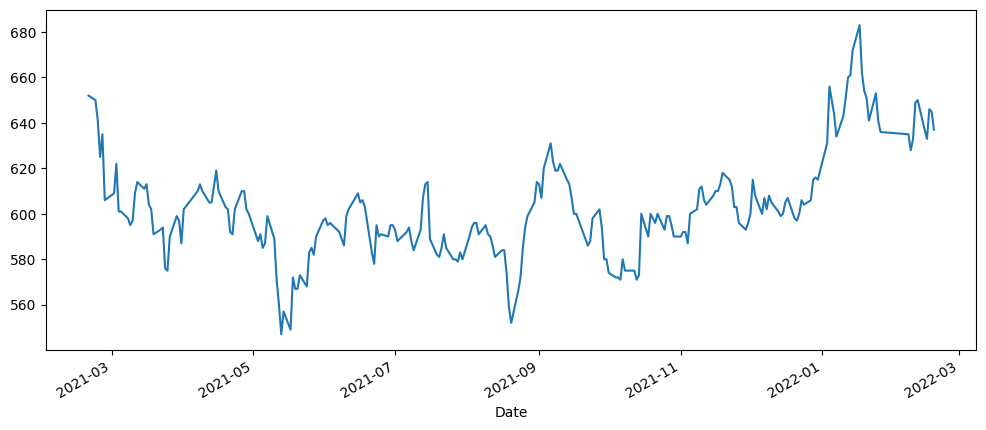

In [ ]:
df.Close.plot(figsize=(12,5))

PART 2:快速變更股票代碼、區間資料

In [ ]:
import datetime

In [ ]:
time_start = input("輸入開始日期 : ")
time_end = input("輸入結束日期 : ")
initial = datetime.datetime.strptime( '1970-01-01' , '%Y-%m-%d' )
start = datetime.datetime.strptime( str(time_start) , '%Y-%m-%d' )
end = datetime.datetime.strptime( str(time_end), '%Y-%m-%d' )
print("初始時間 : " + str(initial))
print("開始時間 : " + str(start))
print("結束時間 : " + str(end))

In [ ]:
period1 = start - initial
period2 = end - initial
print("開始時間差距 : " + str(period1))
print("結束時間差距 : " + str(period2))

In [ ]:
days = 24 * 60 * 60    #一天有86400秒 
s1 = period1.days * days
s2 = period2.days * days
print("開始時間 : " + str(s1))
print("結束時間 : " + str(s2))

In [ ]:
days = 24 * 60 * 60    #一天有86400秒 
stock_id = input("請輸入股票代碼 : ",)
time_start = input("輸入開始日期 : ")
time_end = input("輸入結束日期 : ")
initial = datetime.datetime.strptime( '1970-01-01' , '%Y-%m-%d' )
start = datetime.datetime.strptime( str(time_start) , '%Y-%m-%d' )
end = datetime.datetime.strptime( str(time_end), '%Y-%m-%d' )
period1 = start - initial
period2 = end - initial
s1 = period1.days * days
s2 = period2.days * days
url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=" + str(s1) + "&amp;period2=" + str(s2) + "&amp;interval=1d&amp;events=history&amp;includeAdjustedClose=true"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text),index_col = "Date",parse_dates = ["Date"])
df.Close.plot(figsize=(12,5))

In [ ]:
while True:
    try:
        days = 24 * 60 * 60    #一天有86400秒 
        stock_id = input("請輸入股票代碼 : ",)
        time_start = input("輸入開始日期 : ")
        time_end = input("輸入結束日期 : ")
        initial = datetime.datetime.strptime( '1970-01-01' , '%Y-%m-%d' )
        start = datetime.datetime.strptime( str(time_start) , '%Y-%m-%d' )
        end = datetime.datetime.strptime( str(time_end), '%Y-%m-%d' )
        period1 = start - initial
        period2 = end - initial
        s1 = period1.days * days
        s2 = period2.days * days
        url = url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=" + str(s1) + "&amp;period2=" + str(s2) + "&amp;interval=1d&amp;events=history&amp;includeAdjustedClose=true"
        response = requests.get(url)
        df = pd.read_csv(StringIO(response.text),index_col = "Date",parse_dates = ["Date"])
        df.Close.plot(figsize=(12,5))
        break
    except:
        print("輸入錯誤格式，請重新輸入")

In [ ]:
#address = r"C:\Users\adsad\OneDrive\Desktop\stock\\" + stock_id + ".csv"
#df.to_csv(address)